# CHENNAI HOUSE PRICE **PREDICTION**

1. Problem Statement
2. Data
3. Minimum Requirements

# Problem Statement

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

## Data

The historical sale data is available here. The features of the house and the sale price are given in two different datasets - participants must merge them to do further analysis.

## Minimum ***Requirements***


It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate

# **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading The **Dataset**

In [2]:
df = pd.read_csv("train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250



# Exploratory Data Analysis

In [3]:
#seeing the scale of dataset
df.shape

(7109, 22)

In [4]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [5]:
#check for null values
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
#Filling the null values with appropriate values
df = df.fillna({'N_BEDROOM':df['N_BEDROOM'].median(),'N_BATHROOM':df['N_BATHROOM'].median(),'QS_OVERALL':df['QS_OVERALL'].mean()})

In [7]:
#Now there is  no null values present
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [8]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [9]:
#changing the Datatypes
df['DATE_SALE']= pd.to_datetime(df['DATE_SALE'])
df['N_BEDROOM']= df['N_BEDROOM'].astype(int)
df['N_BATHROOM']=df['N_BATHROOM'].astype(int)
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

In [10]:
#droping PRT_ID
df.drop(['PRT_ID'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

# AREA

In [12]:
# correcting spelling Mistakes in Every Features
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [13]:
"df.replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar','Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'},inplace=True)"

"df.replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar','Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'},inplace=True)"

In [14]:
# no spelling mistakes
df.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

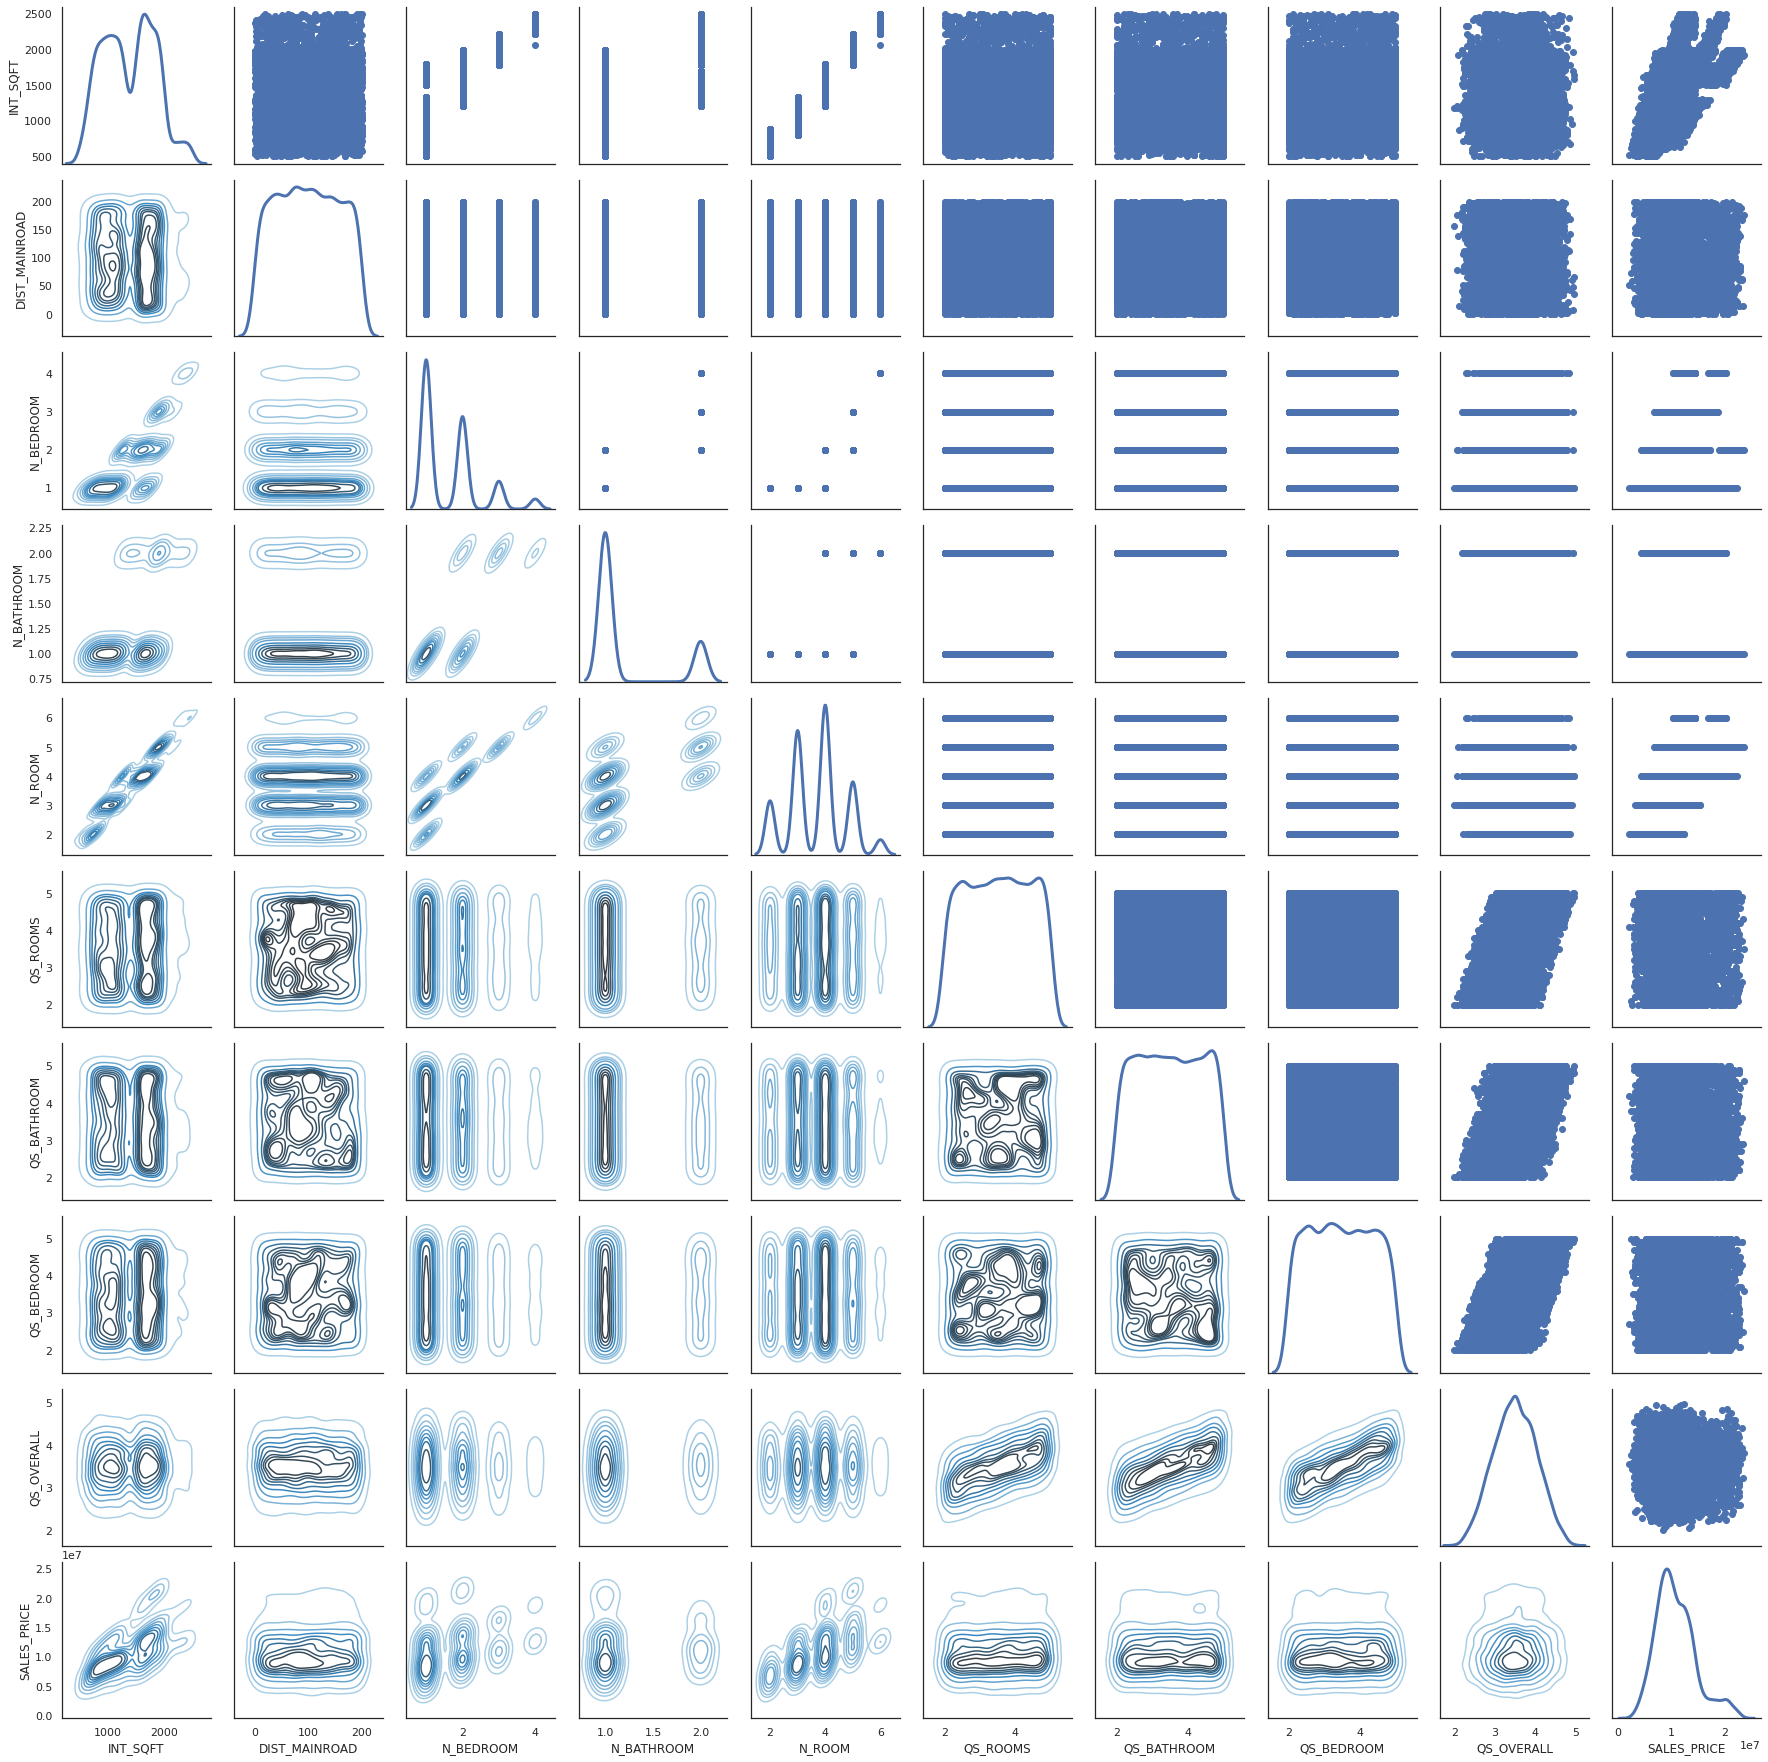

In [15]:
sns.set(style="white")
df = df.loc[:,['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)


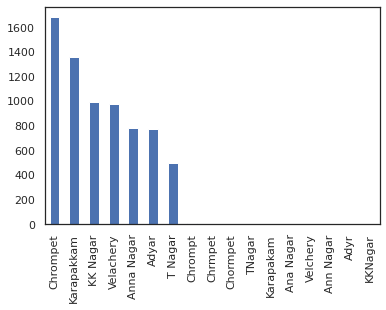

In [16]:
df.AREA.value_counts().plot(kind='bar')

# INT **SQFT**

In [17]:
#there is no outlier 
df.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [18]:
#as we see there are 1699 unique values
df.INT_SQFT.nunique()

1699

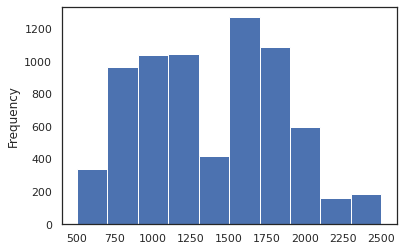

In [19]:
#we see the house having 750 to 1250,1500 to 2000sqft is preferred
df.INT_SQFT.plot(kind = 'hist')

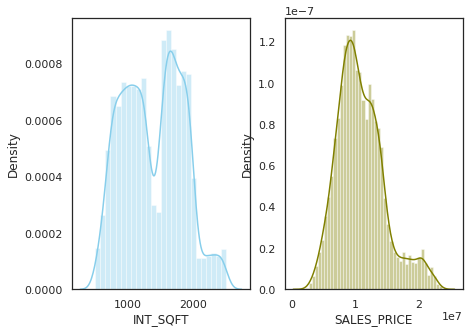

In [20]:
f, axes = plt.subplots(1, 2, figsize=(7, 5))
sns.distplot( df["INT_SQFT"] , color="skyblue", ax=axes[0])
sns.distplot( df["SALES_PRICE"] , color="olive", ax=axes[1])


# YEAR SALE

In [21]:
# creating new feature for Eda
df['YEAR_SALE'] = df['DATE_SALE'].dt.year

In [22]:
df.drop(['DATE_SALE'],axis=1)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006
2,Adyar,909,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012
3,Velachery,1855,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,2011
7105,Velachery,1897,52,3,2,5,Family,Yes,1995-11-04,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,2004
7106,Velachery,1614,152,2,1,4,Normal Sale,No,1978-01-09,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,2006
7107,Karapakkam,787,40,1,1,2,Partial,Yes,1977-11-08,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,2009


In [23]:
#we are seeing the sales in each year
df.YEAR_SALE.value_counts()

2010    1341
2011    1300
2009    1122
2008     814
2012     654
2007     651
2013     365
2014     335
2006     253
2004     116
2005     107
2015      51
Name: YEAR_SALE, dtype: int64

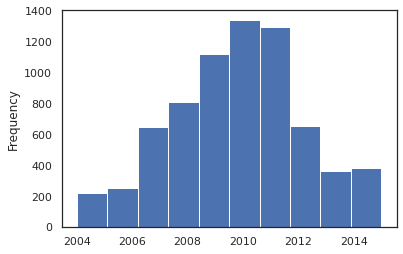

In [24]:
# in year 2010 the sales is high other than any year
df.YEAR_SALE.plot(kind='hist');


# DIST MAINROAD

In [25]:
df.DIST_MAINROAD.value_counts()

39     56
51     53
78     52
77     49
73     48
       ..
33     24
136    24
167    24
12     23
25     20
Name: DIST_MAINROAD, Length: 201, dtype: int64

In [26]:

df.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

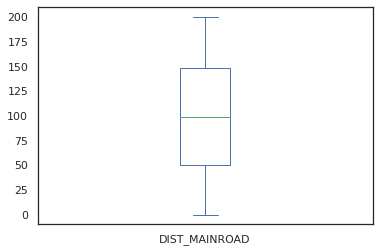

In [27]:

df.DIST_MAINROAD.plot(kind='box')


# N BEDROOM

In [28]:
# the majority of houses sold are having single bedroom
df.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

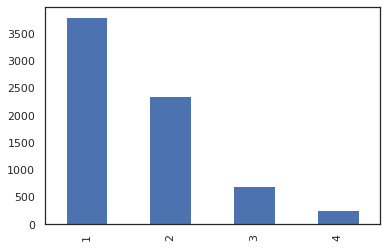

In [29]:

df.N_BEDROOM.value_counts().plot(kind = 'bar')


# N BATHROOM

In [30]:

df.N_BATHROOM.value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

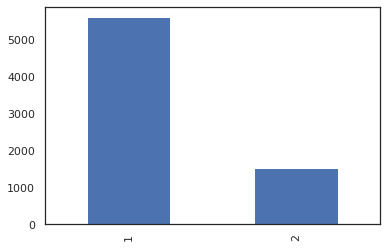

In [31]:
# as we see the 80% of houses sold having one bathroom
df.N_BATHROOM.value_counts().plot(kind='bar')


# N ROOM

In [32]:

df.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

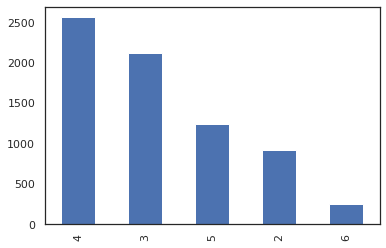

In [33]:
# we see the 1/3rd of houses sold having total number of rooms 4
df.N_ROOM.value_counts().plot(kind='bar')


# SALE COND

In [34]:

df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [35]:
#correcting spelling mistakes
df.replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'},inplace=True)

In [36]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

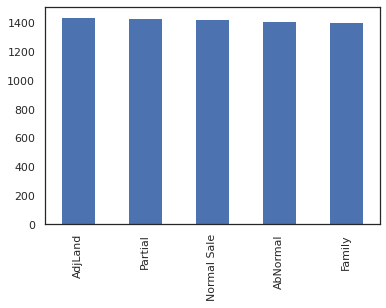

In [37]:
df.SALE_COND.value_counts().plot(kind='bar')



# PARK FACIL

In [38]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [39]:
df.replace({'Noo':'No'},inplace=True)

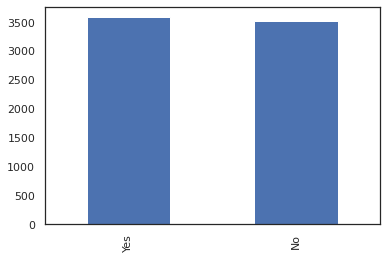

In [40]:

df.replace({'Noo':'No'},inplace=True)
# we see it is balanced 50:50
df.PARK_FACIL.value_counts().plot(kind='bar')

# YEAR BUILD

In [41]:
#we have to create new feature in which year each houses build
df.DATE_BUILD.value_counts()

1987-02-07    6
1999-04-04    5
2000-08-27    4
1982-05-13    4
1989-08-04    4
             ..
1970-07-24    1
1998-12-02    1
1977-04-11    1
1986-04-21    1
1961-07-24    1
Name: DATE_BUILD, Length: 5808, dtype: int64

In [42]:
df['YEAR_BUILD'] = df['DATE_BUILD'].dt.year

In [43]:
df.drop(['DATE_BUILD'],axis=1)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,2011,1962
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,2004,1995
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,2006,1978
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,2009,1977


In [44]:

df.YEAR_BUILD.value_counts()

1985    200
1988    197
2002    194
1990    191
1999    189
       ... 
1954     11
2010      9
1951      6
1949      2
1950      2
Name: YEAR_BUILD, Length: 62, dtype: int64

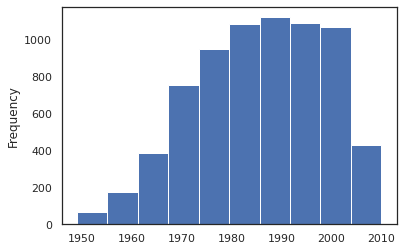

In [45]:

df.YEAR_BUILD.plot(kind='hist')

In [46]:
df.YEAR_BUILD.describe()

count    7109.000000
mean     1985.491912
std        12.648859
min      1949.000000
25%      1976.000000
50%      1986.000000
75%      1996.000000
max      2010.000000
Name: YEAR_BUILD, dtype: float64


# AGE

In [47]:
# creating a new feature which is Age of the houses
df['AGE']= df['YEAR_SALE']- df['YEAR_BUILD']

In [48]:
df.AGE.describe()

count    7109.000000
mean       24.276270
std        12.334164
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: AGE, dtype: float64

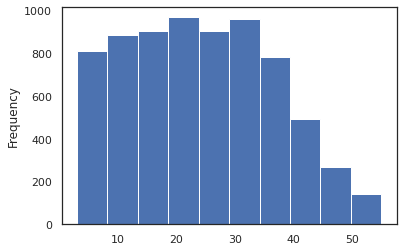

In [49]:
df.AGE.plot(kind='hist')


# BUILDTYPE

In [50]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [51]:
df.replace({'Other':'Others','Comercial':'Commercial'},inplace=True)

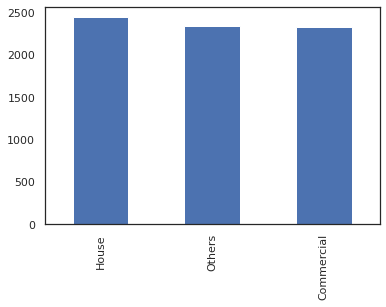

In [52]:
df.BUILDTYPE.value_counts().plot(kind='bar')

# UTILITY AVAIL

In [53]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [54]:
df.replace({'All Pub':'AllPub'},inplace=True)

In [55]:
df.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

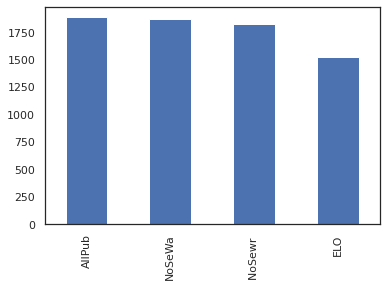

In [56]:
df.UTILITY_AVAIL.value_counts().plot(kind='bar')


# STREET

In [57]:

df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [58]:
df.replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)

In [59]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

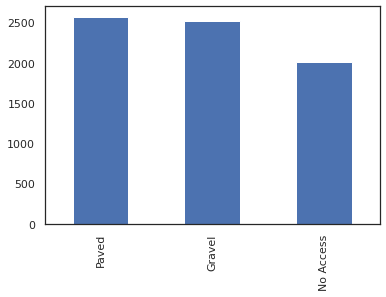

In [60]:
df.STREET.value_counts().plot(kind='bar')


# MZZONE

In [61]:

df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

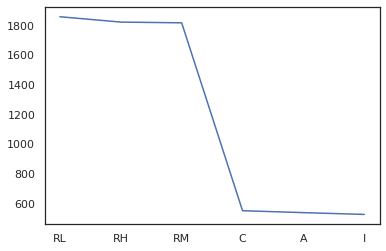

In [62]:

df.MZZONE.value_counts().plot(kind='line')

# QS ROOMS

In [63]:
df.QS_ROOMS.value_counts()

2.5    265
3.8    259
3.6    255
4.6    252
3.9    245
4.9    242
3.4    240
4.7    239
3.3    239
4.8    239
4.2    239
2.6    237
2.1    236
3.1    230
5.0    228
3.0    228
3.5    227
2.8    226
4.3    225
2.3    224
4.1    222
2.9    220
4.4    219
4.5    218
4.0    218
2.2    213
2.4    208
3.2    208
3.7    205
2.0    203
2.7    200
Name: QS_ROOMS, dtype: int64

In [64]:
df.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

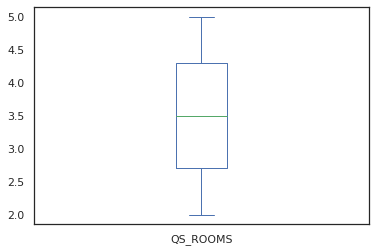

In [65]:
df.QS_ROOMS.plot(kind='box')

# QS BATHROOM

In [66]:
df.QS_BATHROOM.value_counts()

2.7    256
4.8    255
3.7    251
4.7    247
4.9    245
3.0    241
4.2    237
4.6    234
3.4    234
2.2    234
2.5    233
4.0    232
3.1    232
4.5    231
2.4    230
2.9    228
3.3    227
3.2    226
2.6    226
3.5    225
2.1    224
4.3    224
2.0    222
3.6    221
2.3    220
4.4    219
5.0    219
3.9    211
4.1    210
3.8    209
2.8    206
Name: QS_BATHROOM, dtype: int64

In [67]:

df.QS_BATHROOM.describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

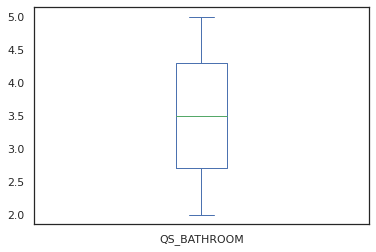

In [68]:
df.QS_BATHROOM.plot(kind='box')

# QS BEDROOM

In [69]:
df.QS_BEDROOM.value_counts()

2.6    273
3.2    253
4.0    248
2.4    244
3.8    244
3.1    243
2.1    242
3.0    241
3.4    239
4.3    237
4.4    237
3.5    237
2.2    237
3.3    234
4.6    233
4.7    228
4.5    227
2.5    226
3.6    225
4.1    223
2.7    222
2.0    221
3.9    220
2.9    219
5.0    217
4.2    212
4.8    211
2.8    210
3.7    203
4.9    203
2.3    200
Name: QS_BEDROOM, dtype: int64

In [70]:
df.QS_BEDROOM.describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

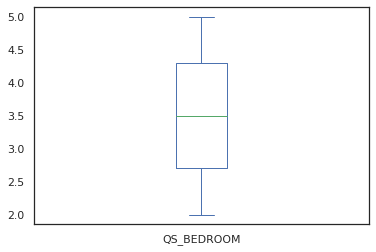

In [71]:
df.QS_BEDROOM.plot(kind='box')


# QS OVERALL

In [72]:
df.QS_OVERALL.value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 480, dtype: int64

In [73]:
df.QS_OVERALL.describe()

count    7109.000000
mean        3.503254
std         0.525440
min         2.000000
25%         3.130000
50%         3.503254
75%         3.880000
max         4.970000
Name: QS_OVERALL, dtype: float64

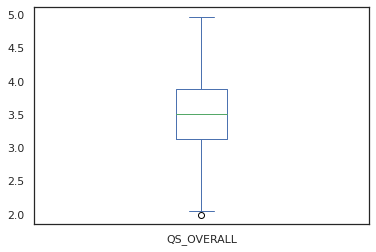

In [74]:
df.QS_OVERALL.plot(kind='box')

In [75]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,YEAR_SALE,YEAR_BUILD,AGE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,...,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,...,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,...,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,...,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,...,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30



# SALES PRICE

In [76]:
# this is our target variable
df.SALES_PRICE.value_counts()

5378000     2
9429000     2
4971250     2
4546625     2
11930880    2
           ..
6928000     1
14874950    1
9304770     1
6980320     1
9976480     1
Name: SALES_PRICE, Length: 7057, dtype: int64

In [77]:
df.SALES_PRICE.describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

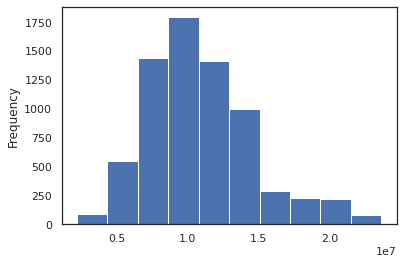

In [78]:
df.SALES_PRICE.plot(kind='hist')

In [79]:
df.corr()['SALES_PRICE'].sort_values(ascending=False)

SALES_PRICE      1.000000
INT_SQFT         0.612125
N_ROOM           0.602760
N_BEDROOM        0.330987
YEAR_BUILD       0.116043
N_BATHROOM       0.108834
QS_ROOMS         0.021967
QS_OVERALL       0.020485
QS_BEDROOM       0.018804
DIST_MAINROAD    0.018783
YEAR_SALE        0.000906
QS_BATHROOM     -0.011377
AGE             -0.118842
Name: SALES_PRICE, dtype: float64

# Data Visualization

# FEATURE VS TARGET

In [80]:
def bar(col):
  plt.figure(figsize=(8,5))
  sns.barplot(x=df[col],y=df.SALES_PRICE)


## AREA

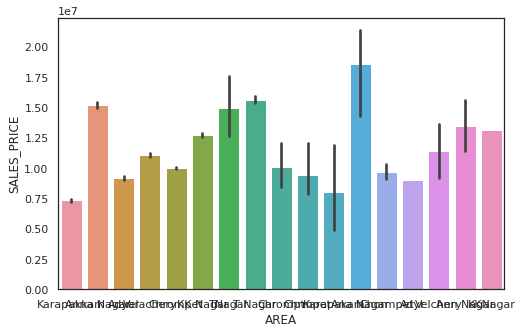

In [81]:
# we see there is linear relation b/w sales price and area
bar('AREA')


# INT SQFT

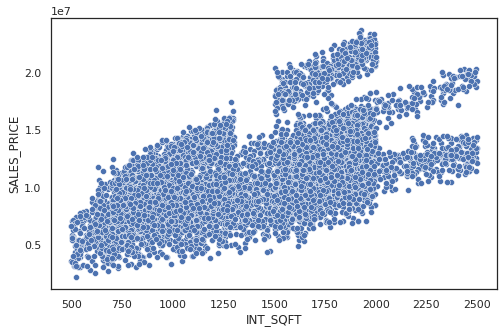

In [82]:
#we see there is linear relation b/w sales price and int sqft
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.INT_SQFT,y=df.SALES_PRICE)


# YEAR SALE

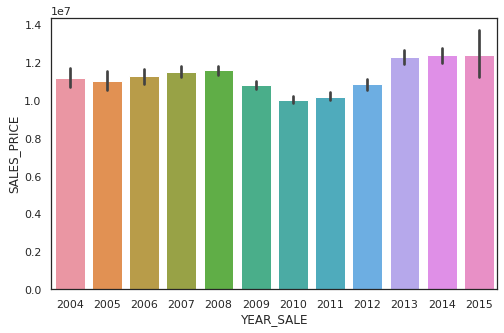

In [83]:
# there is some linear relation b/w sales price and year 
bar('YEAR_SALE')

# DIST MAINROAD

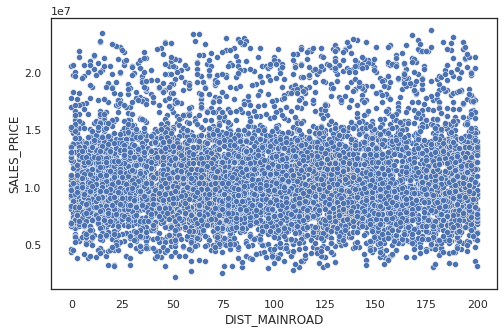

In [84]:
# there is no pattern
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.DIST_MAINROAD,y=df.SALES_PRICE)

# N BEDROOM

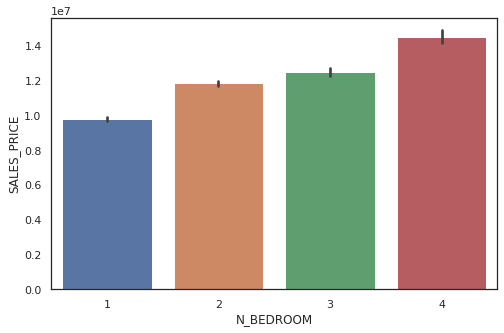

In [85]:
# there is linear relation b/w sales price and n bedrooms
bar('N_BEDROOM')


# N BATHROOM

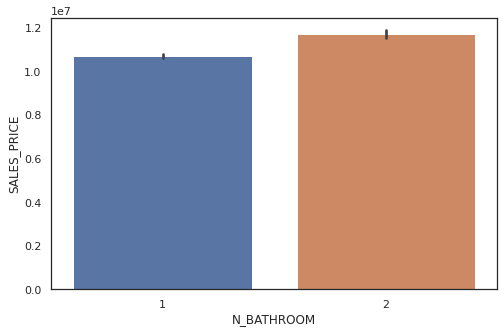

In [86]:
#there is linear relation b/w sales price and n bathroom
bar('N_BATHROOM')


# N ROOM

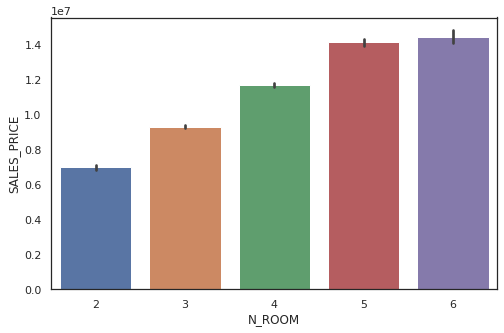

In [87]:
# there is linear relation b/w sales price and n rooms
bar('N_ROOM')


# SALE COND

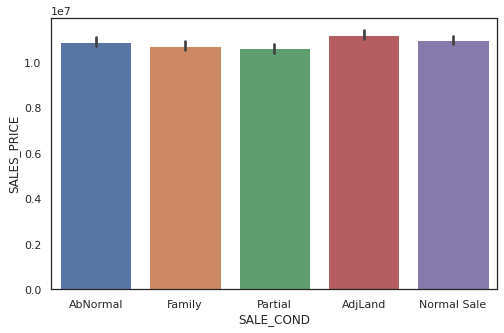

In [88]:
# no patterns found
bar('SALE_COND')


# PARK FACIL

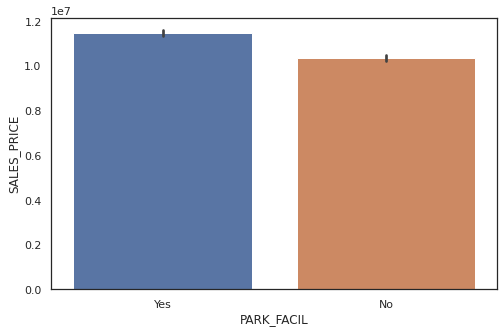

In [89]:

#  there is linear relation b/w sales price and park facil
bar('PARK_FACIL')


# YEAR BUILD

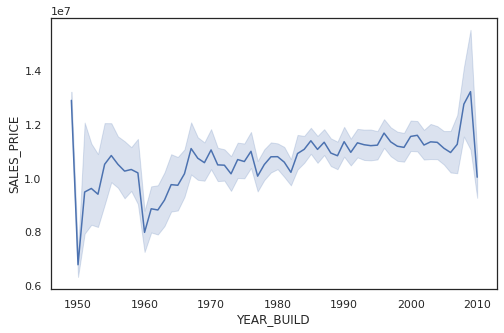

In [90]:
#there is some linear relation 
plt.figure(figsize=(8,5))
sns.lineplot(x=df.YEAR_BUILD,y=df.SALES_PRICE)

# BUILD TYPE

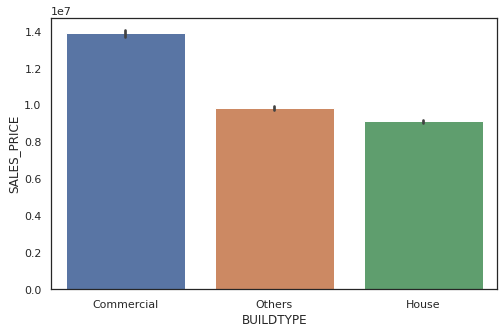

In [91]:
# we see there is linear relation b/w sales price and buildtype
bar('BUILDTYPE')


# UTILITY AVAIL

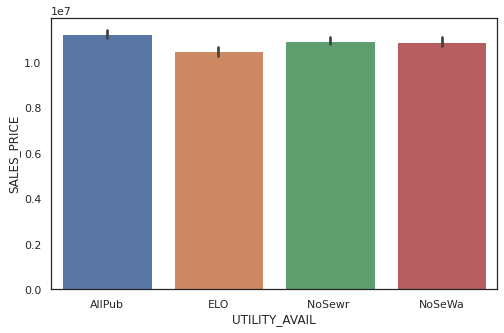

In [92]:
# there is some linear relation b/w sales price and utility avail
bar('UTILITY_AVAIL')

# STREET

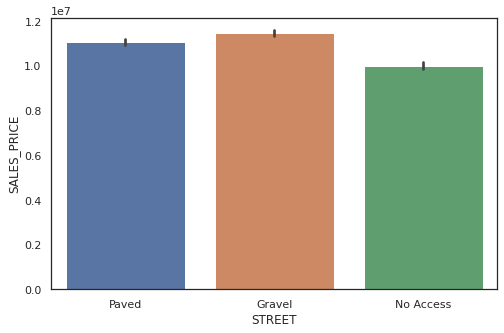

In [93]:
# there is somelinear relation b/w sales price and street
bar('STREET')

# MZZONE

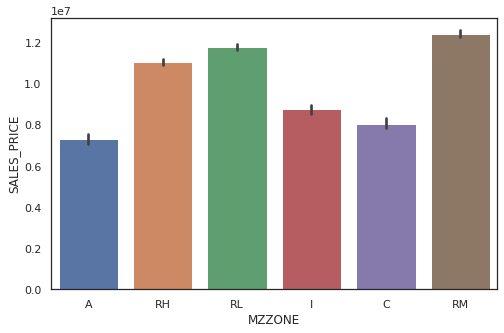

In [94]:
# there is linear relation b/w sales price and mzzone
bar('MZZONE')


# QS ROOMS

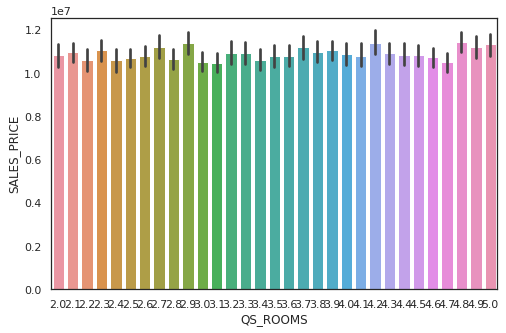

In [95]:
# no patterns found
bar('QS_ROOMS')

# QS BATHROOM

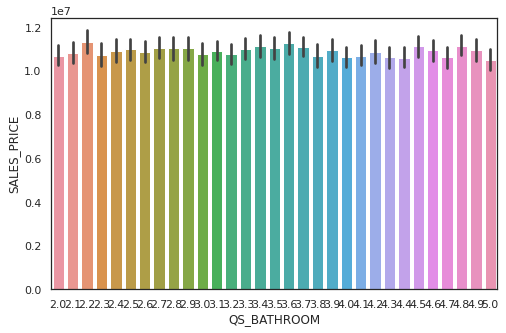

In [96]:
# no patterns found
bar('QS_BATHROOM')

# QS BEDROOM

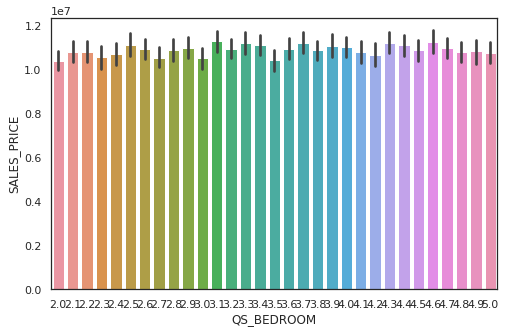

In [97]:
# no patterns found
bar('QS_BEDROOM')

# QS OVERALL

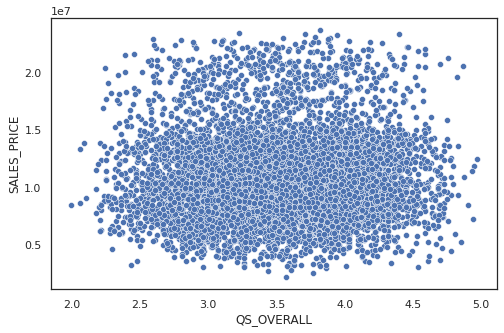

In [98]:
#no patterns found
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.QS_OVERALL,y=df.SALES_PRICE)


# SALE PRICE

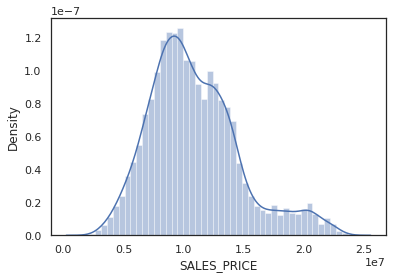

In [99]:
sns.distplot(df['SALES_PRICE'])

As we see it is normal distribution with slightly right skewed data.


# Modelling

In [100]:
df.drop(['YEAR_SALE','YEAR_BUILD','DATE_SALE','DATE_BUILD'],axis=1,inplace=True)

In [101]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,1,1,3,4.0,3.9,4.9,4.330,7600000,...,0,0,0,0,1,0,0,0,0,0
1,1986,26,2,1,5,4.9,4.2,2.5,3.765,21717770,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1,1,3,4.1,3.8,2.2,3.090,13159200,...,1,0,0,0,0,0,0,0,1,0
3,1855,14,3,2,5,4.7,3.9,3.6,4.010,9630290,...,0,0,1,0,1,0,1,0,0,0
4,1226,84,1,1,3,3.0,2.5,4.1,3.290,7406250,...,0,0,0,0,0,1,0,0,0,0


In [102]:
X = df.drop('SALES_PRICE',axis=1)
y = df.SALES_PRICE

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression().fit(X_train,y_train)

In [105]:
lin.score(X_train,y_train)

0.9582684901322985

# Random Forest

In [106]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [107]:
rf = RandomForestRegressor(n_estimators=500).fit(X_train,y_train)
rf.score(X_train,y_train)

0.9964808718107934


# XG boost

In [108]:
xg = XGBRegressor().fit(X_train,y_train)
xg.score(X_train,y_train)

[05:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9825804002877049

# Metrics

In [109]:
y_pred = lin.predict(X_test)
y_pred

array([13842084.10066336, 13005762.48848708, 18303804.04035911, ...,
       14823050.98503042,  8459753.51756442,  4863950.70383129])

In [110]:
from sklearn import metrics
print('R2 score:', metrics.r2_score(y_test,y_pred))

R2 score: 0.9572170021111939
